In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
from skimage import feature

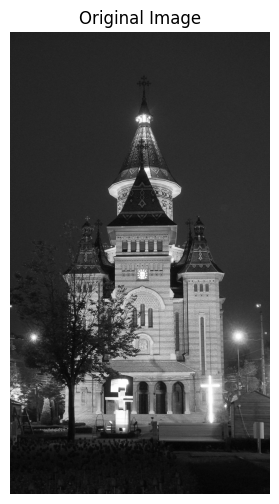

In [13]:
def load_and_display_image(image_path):
    """
    Load an image and display it.
    :param image_path: Path to the image file.
    :return: Loaded image.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.show()
    return image

# Example usage
image_path = '/content/00001.png'
image = load_and_display_image(image_path)


In [14]:
def apply_sobel(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobel_x, sobel_y)
    return np.uint8(np.absolute(sobel))

def apply_canny(image, low_threshold=50, high_threshold=150):
    return cv2.Canny(image, low_threshold, high_threshold)

def apply_laplacian(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    return np.uint8(np.absolute(laplacian))

def apply_prewitt(image):
    prewitt_x = filters.prewitt_h(image, mode='reflect')
    prewitt_y = filters.prewitt_v(image, mode='reflect')
    prewitt = np.hypot(prewitt_x, prewitt_y)
    return (prewitt * 255).astype(np.uint8)

def apply_roberts(image):
    roberts = filters.roberts(image)
    return (roberts * 255).astype(np.uint8)


In [15]:
def visualize_results(image, methods_results, methods_names):
    """
    Visualize original image and the outputs of edge detection methods.
    :param image: Original image.
    :param methods_results: List of images processed by edge detection methods.
    :param methods_names: List of method names corresponding to the results.
    """
    plt.figure(figsize=(16, 8))
    plt.subplot(2, 4, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    for i, (result, name) in enumerate(zip(methods_results, methods_names), start=2):
        plt.subplot(2, 4, i)
        plt.imshow(result, cmap='gray')
        plt.title(name)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


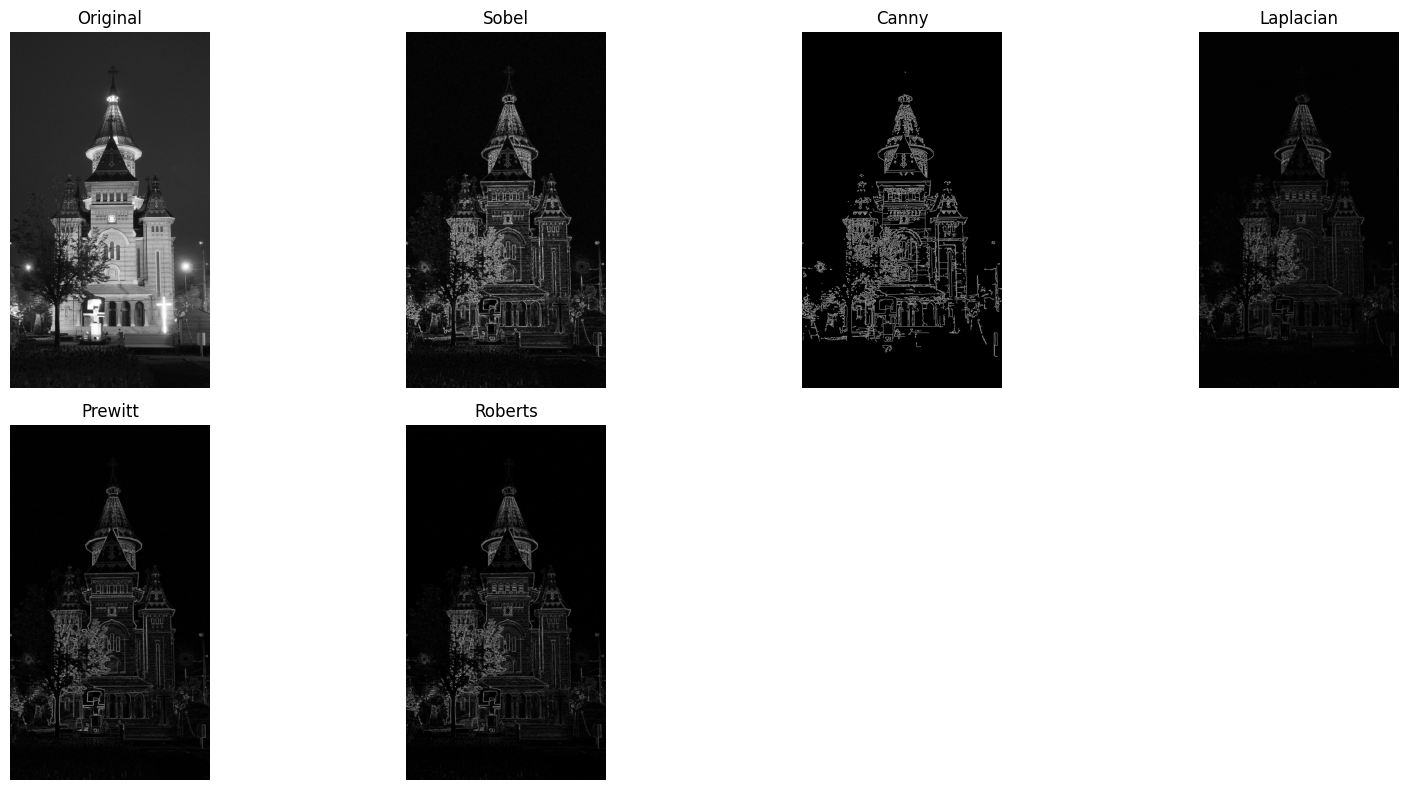

In [16]:
# Apply methods
sobel_result = apply_sobel(image)
canny_result = apply_canny(image)
laplacian_result = apply_laplacian(image)
def apply_prewitt(image):
    prewitt_x = filters.prewitt_h(image)
    prewitt_y = filters.prewitt_v(image)
    prewitt = np.hypot(prewitt_x, prewitt_y)
    return (prewitt * 255).astype(np.uint8)
prewitt_result = apply_prewitt(image)
roberts_result = apply_roberts(image)

# Combine results
methods_results = [sobel_result, canny_result, laplacian_result, prewitt_result, roberts_result]
methods_names = ['Sobel', 'Canny', 'Laplacian', 'Prewitt', 'Roberts']

# Visualize results
visualize_results(image, methods_results, methods_names)
